### About the Data:
This dataset is adapted from the Wine Data Set from Wine - UCI Machine Learning Repository by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

### Problem Statement:
The problem statement is to analyze the data to create a cluster of wines based on their chemical constituents and predict the cluster labels obtained from the clustering algorithms using the supervised Learning classification techniques.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = 50

# display all rows of the dataframe
pd.options.display.max_rows = 10

# import various functions from sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
# Step 1: Read the Excel file without specifying headers
df_raw = pd.read_excel("C:/Avisha/Great Lakes (PGP-DSE)/Course Resources/Week (29-30) - Unsupervised Learning/Project/Project+-+Files/wine_data.xlsx", header=None)

# Step 2: Split each value in each cell by comma and expand them into separate columns
df = df_raw[0].str.split(',', expand=True)

# Step 3: Assign column names
column_names = ['Wine','Alcohol','Malic_acid','Ash','Alcalinity','Mg','Phenols',
                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity',
                'Hue','OD_dil_wines','Proline']

df.columns = column_names

# Display the resulting DataFrame with assigned column names
df.head()

Wine Alcohol Malic_acid   Ash Alcalinity   Mg Phenols Flavanoids  \
0    1   14.23       1.71  2.43       15.6  127     2.8       3.06   
1    1    13.2       1.78  2.14       11.2  100    2.65       2.76   
2    1   13.16       2.36  2.67       18.6  101     2.8       3.24   
3    1   14.37       1.95   2.5       16.8  113    3.85       3.49   
4    1   13.24       2.59  2.87         21  118     2.8       2.69   

  Nonflavanoid_phenols Proanthocyanins Color_intensity   Hue OD_dil_wines  \
0                  .28            2.29            5.64  1.04         3.92   
1                  .26            1.28            4.38  1.05          3.4   
2                   .3            2.81            5.68  1.03         3.17   
3                  .24            2.18             7.8   .86         3.45   
4                  .39            1.82            4.32  1.04         2.93   

  Proline  
0    1065  
1    1050  
2    1185  
3    1480  
4     735

In [4]:
# copying the original dataframe to 3 dfs

wine_df = df.copy()
df1 = df.copy()
df2 = df.copy()

In [5]:
# number of rows and columns
wine_df.shape

(178, 14)

In [6]:
## ------------ Missing Value Analysis ----------------- ##

# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = wine_df.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (wine_df.isnull().sum()/wine_df.isnull().count()).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

Total  Percent
Wine                 0      0.0
Alcohol              0      0.0
Malic_acid           0      0.0
Ash                  0      0.0
Alcalinity           0      0.0
...                ...      ...
Proanthocyanins      0      0.0
Color_intensity      0      0.0
Hue                  0      0.0
OD_dil_wines         0      0.0
Proline              0      0.0

[14 rows x 2 columns]

No missing values are there!

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Wine                  178 non-null    object
 1   Alcohol               178 non-null    object
 2   Malic_acid            178 non-null    object
 3   Ash                   178 non-null    object
 4   Alcalinity            178 non-null    object
 5   Mg                    178 non-null    object
 6   Phenols               178 non-null    object
 7   Flavanoids            178 non-null    object
 8   Nonflavanoid_phenols  178 non-null    object
 9   Proanthocyanins       178 non-null    object
 10  Color_intensity       178 non-null    object
 11  Hue                   178 non-null    object
 12  OD_dil_wines          178 non-null    object
 13  Proline               178 non-null    object
dtypes: object(14)
memory usage: 19.6+ KB


In [8]:
# changing the datatypes of all the variables

def convert_columns(df, int_columns=[], float_columns=[]):
    
    # Convert specified columns to integer
    for col in int_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('int64')

    # Convert specified columns to float
    for col in float_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

    return df.info()

# call the function
convert_columns(wine_df, int_columns=['Wine', 'Mg','Proline'], 
                float_columns=['Alcohol','Malic_acid','Ash','Alcalinity','Phenols',
                                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity',
                                'Hue','OD_dil_wines'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD_dil_wines          178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine_df.describe()

Wine     Alcohol  Malic_acid         Ash  Alcalinity          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count  178.000000  178.000000            178.000000       178.000000   
mean     2.295112    2.029270              0.361854         1.590899   
std      0.625851    0.998859              0.124453         0.572359   
min      0.980000    0.340000              0.130000         0.410000   
25%      1.742500    1.205000              0.270000         1.250000   
50%      2.355000    2.135000              0.340000         1.555000   
75%      2.800000    2.875000              0.437500         1.950000   
max      3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  OD_dil_wines      Proline  
count       178.000000  178.000000    178.000000   178.000000  
mean          5.058090    0.957449      2.611685   746.893258  
std           2.318286    0.228572      0.709990   314.907474  
min           1.280000    0.480000      1.270000   278.000000  
25%           3.220000    0.782500      1.937500   500.500000  
50%           4.690000    0.965000      2.780000   673.500000  
75%           6.200000    1.120000      3.170000   985.000000  
max          13.000000    1.710000      4.000000  1680.000000

#### Wine (Target variable)

In [10]:
wine_df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

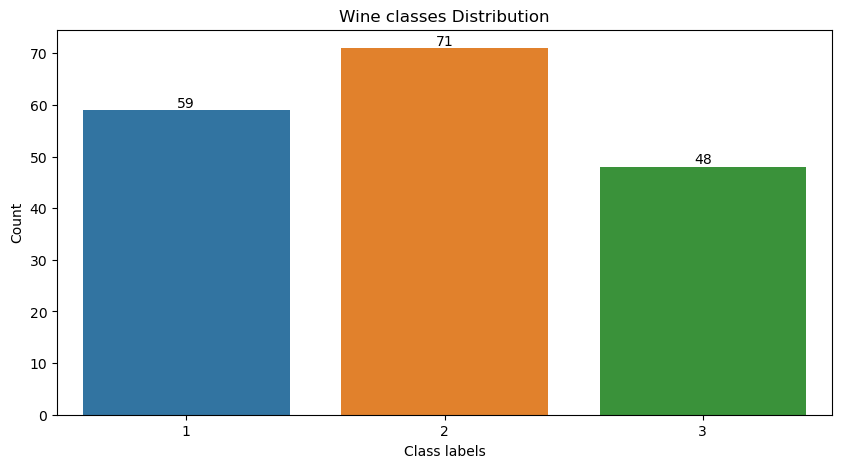

In [11]:
# Visualizing the counts of each class in target column
ax = sns.countplot(data = wine_df, x = 'Wine')
ax.bar_label(ax.containers[0])
plt.title('Wine classes Distribution')
plt.xlabel('Class labels')
plt.ylabel('Count')
plt.show()

### EDA

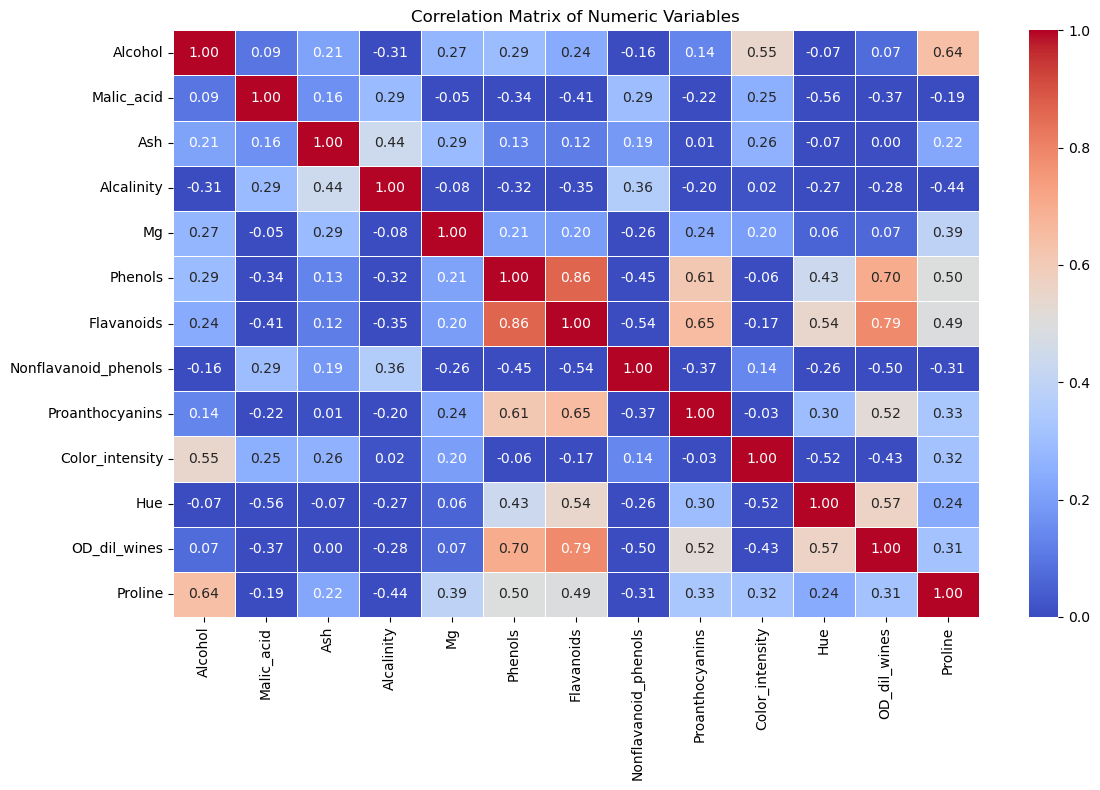

In [12]:
# Correlation matrix

plt.figure(figsize = (12,8))
sns.heatmap(wine_df.iloc[ : ,1:14].corr(), annot = True, vmin = 0, vmax = 1, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

Some features have quite high linear correlation:

* Flavanoids and Phenols (0.86)

* Flavanoids and OD of diluted wines (0.79)

* OD of diluted wines and Phenols (0.70).

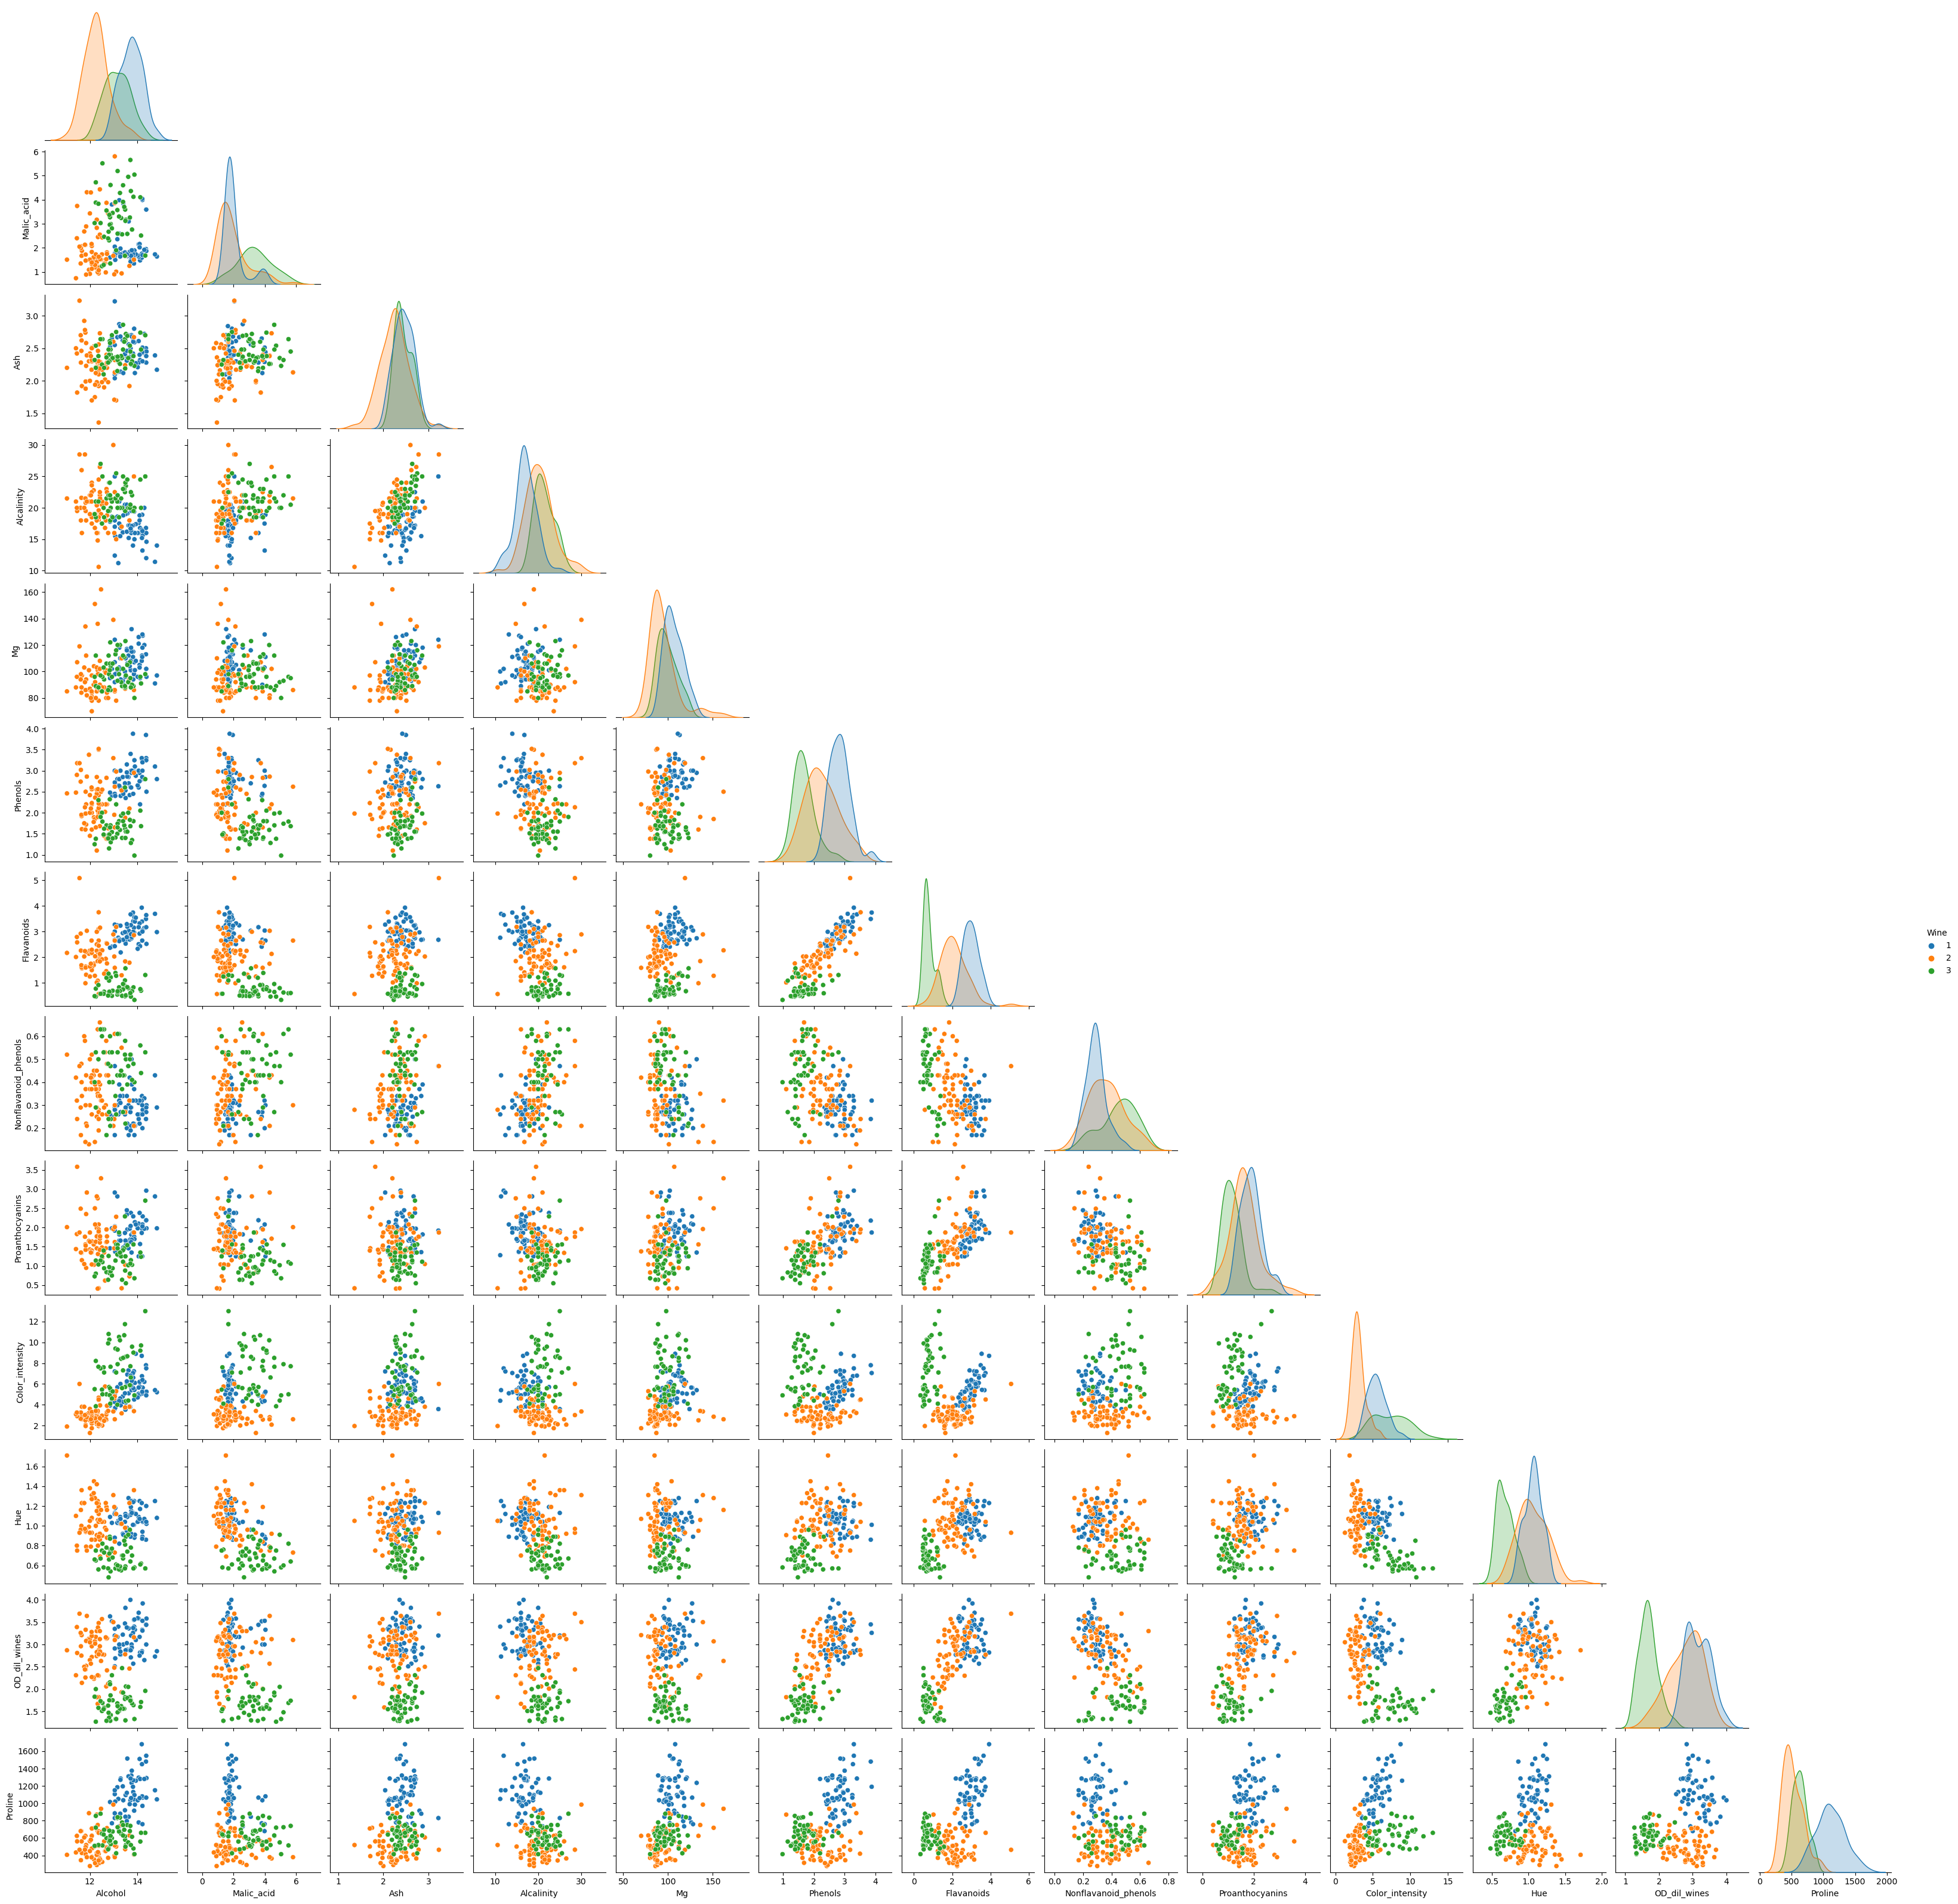

In [13]:
# consider the numeric variables

sns.pairplot(data = wine_df, kind = 'scatter', diag_kind = 'kde', hue = 'Wine',
             palette="tab10", corner=True)
plt.show()

We see that some features separate the classes quite well. For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots). Also, color intensity coupled with total phenols or flavanoids separates quite well the classes.

We could eventually apply dimensionality reduction (for example with PCA we could reduce feature minimizing the loss of information).

### Outlier Analysis and Treatment

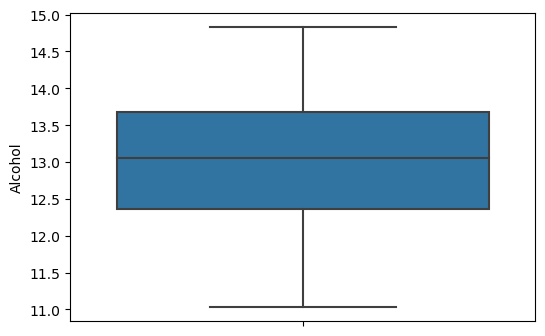

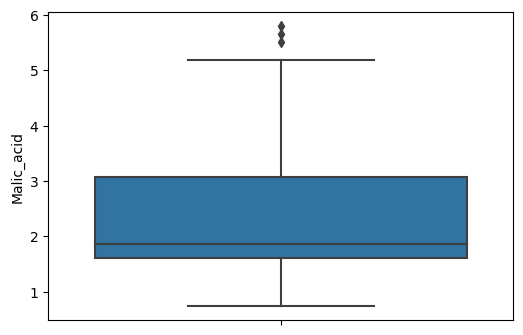

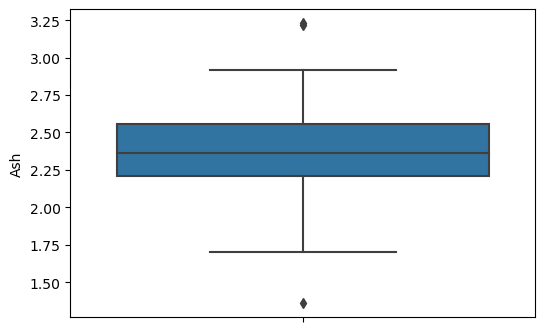

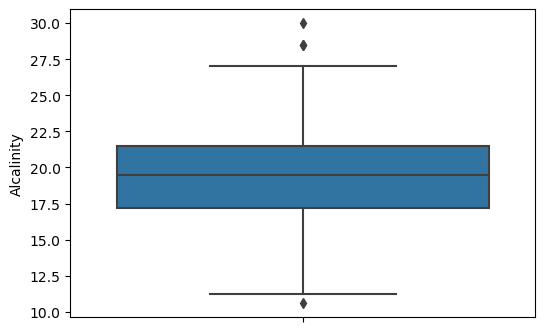

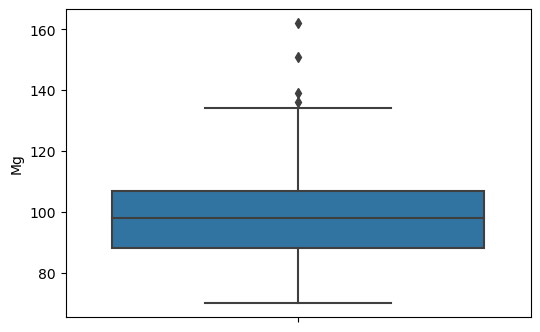

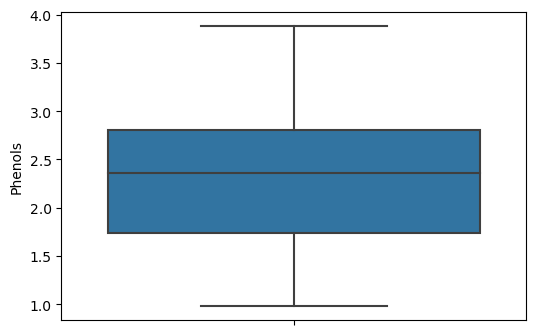

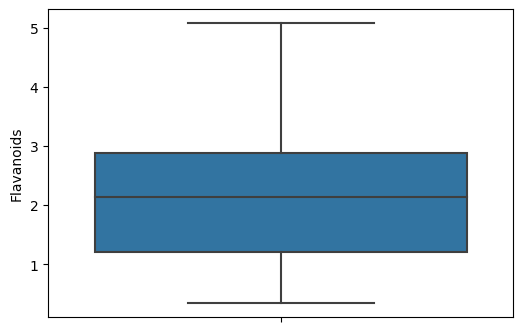

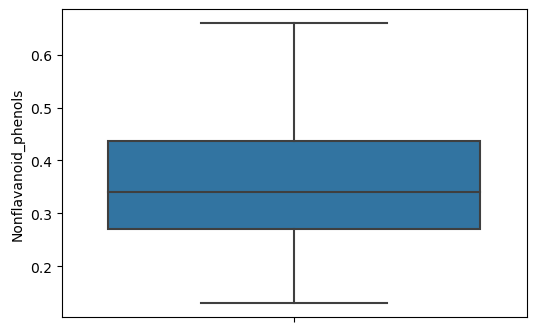

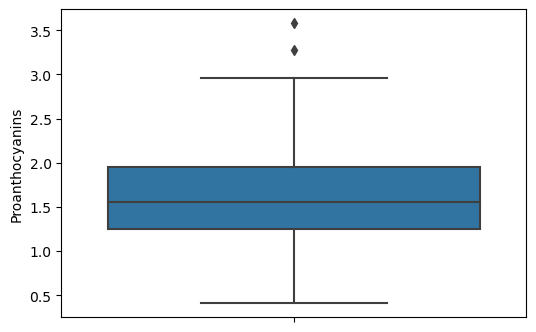

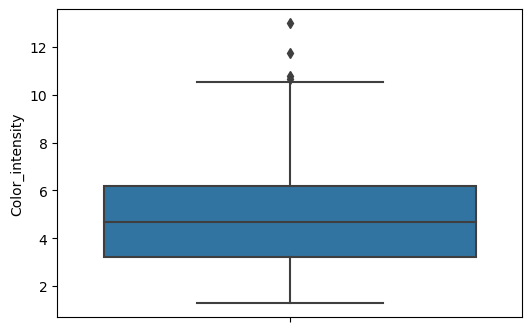

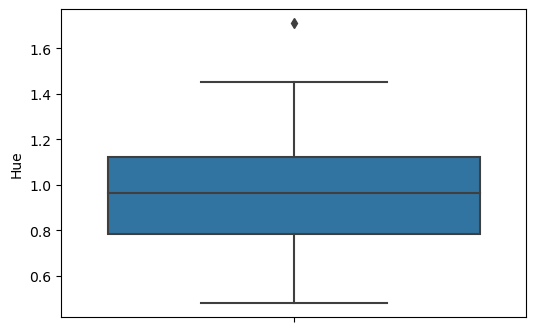

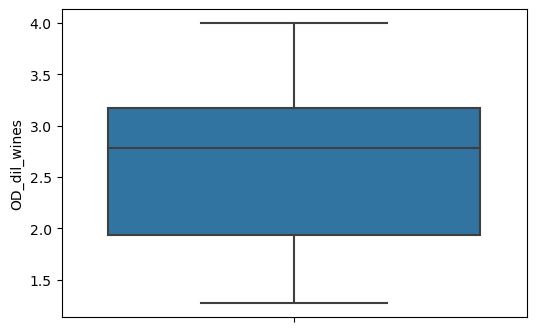

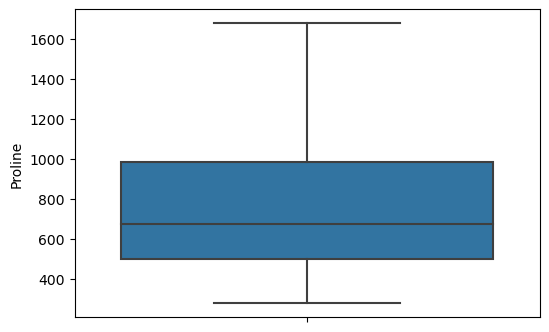

In [14]:
plt.rcParams["figure.figsize"] = [6,4]

df_num = wine_df.drop(['Wine'], axis = 1)

for i in range(df_num.shape[1]):
    sns.boxplot(y = df_num.columns[i], data = df_num)
    plt.show()

There are some variables which have outliers. Before clustering, we remove the outliers using IQR method.

In [15]:
# calculate the first quartile
Q1 = wine_df.quantile(0.25)

# calculate the third quartile
Q3 = wine_df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
wine_df = wine_df[~((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# resetting the index
wine_df = wine_df.reset_index(drop=True)

# check the shape of the data
wine_df.shape

(161, 14)

We again plot the boxplot for each variable to recheck the outliers.

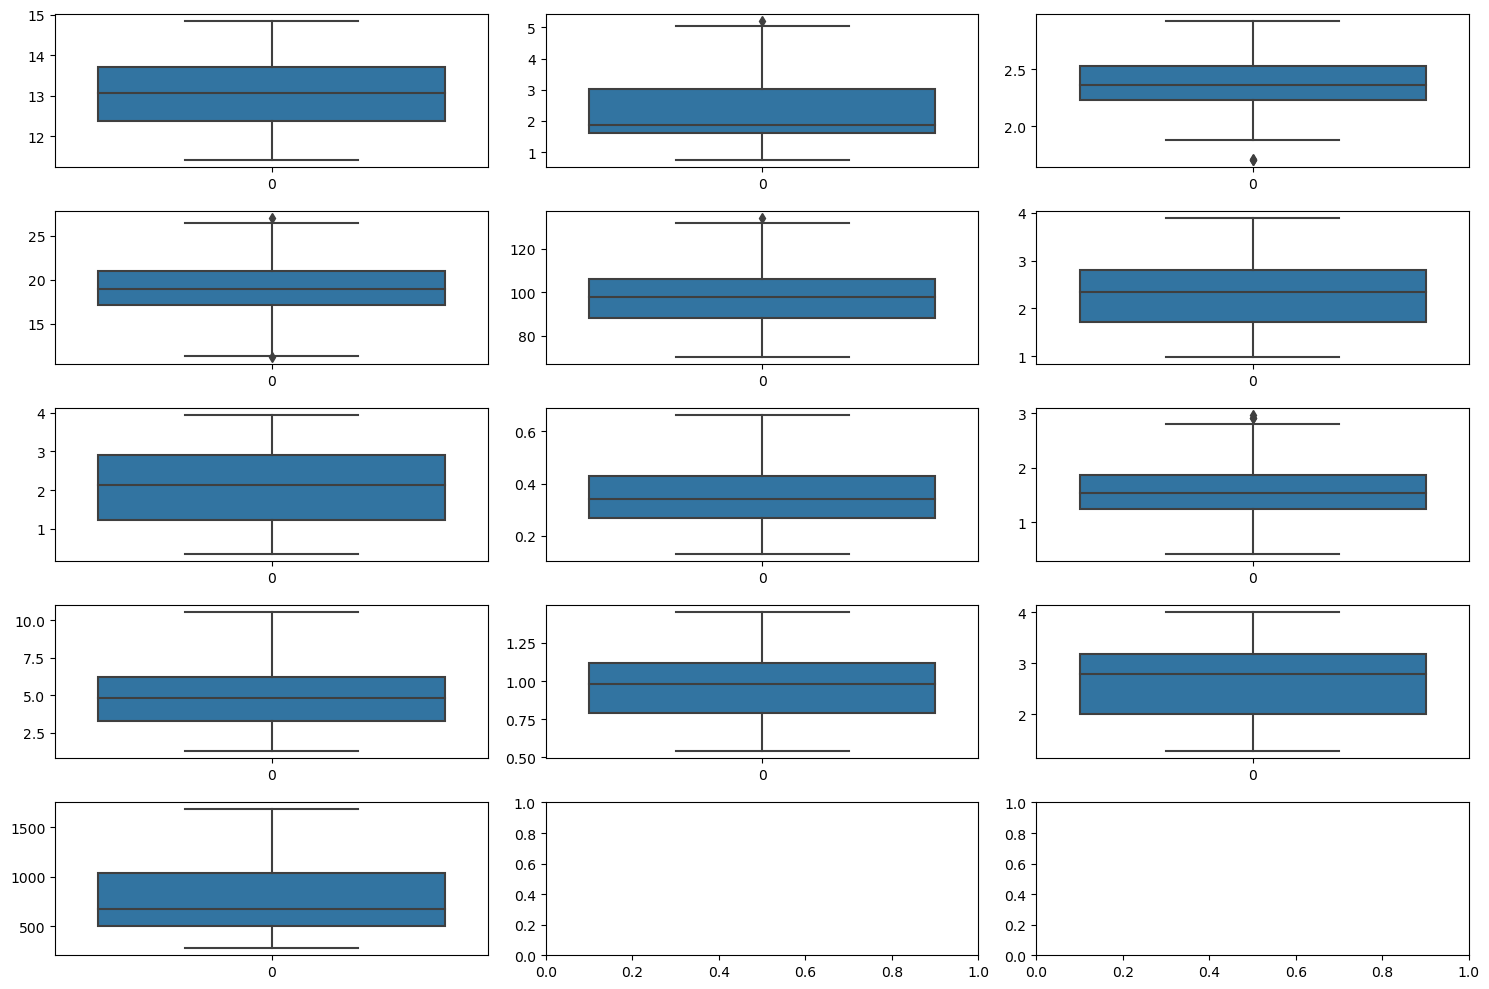

In [16]:
df_num = wine_df.drop(['Wine'], axis = 1)

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(15, 10))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_num[variable], ax = subplot)
    plt.tight_layout()

# display the plot
plt.show()

**Interpretation**: Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that we can see in the variables are moderate outliers that lied within the upper whisker-lower whisker range before removing the original outliers.

Also, the number of observations is reduced from 178 to 161. Thus, we have removed the potential outliers.

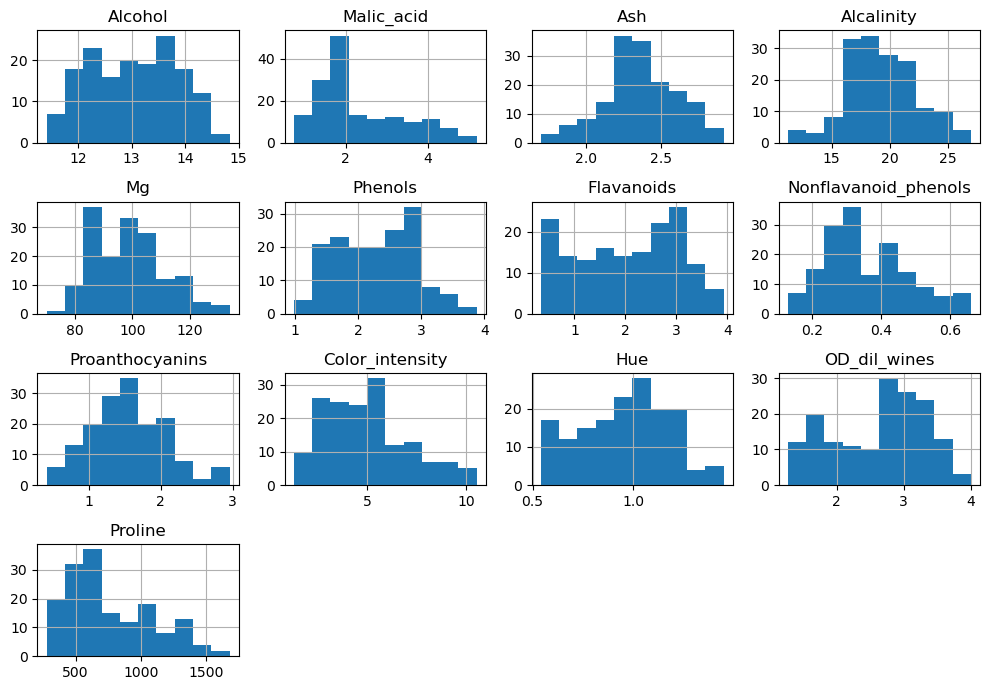

Skewness:


Alcohol           -0.031847
Malic_acid         0.893988
Ash               -0.215661
Alcalinity         0.032577
Mg                 0.498408
                     ...   
Proanthocyanins    0.329645
Color_intensity    0.623476
Hue               -0.140952
OD_dil_wines      -0.360417
Proline            0.697792
Length: 13, dtype: float64

In [17]:
# Checking the skewness in the data after removing the outliers

plt.rcParams["figure.figsize"] = [10,7]
df_num.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_num.skew()

Columns in the dataset: ['Wine', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD_dil_wines', 'Proline']


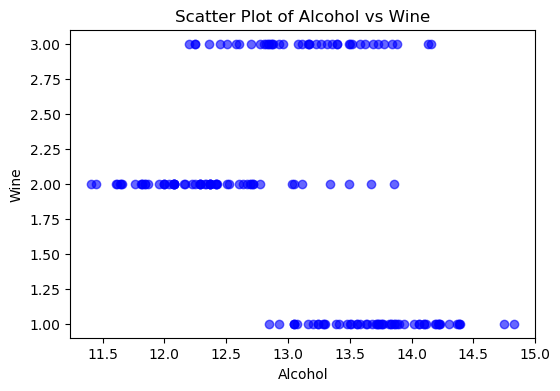

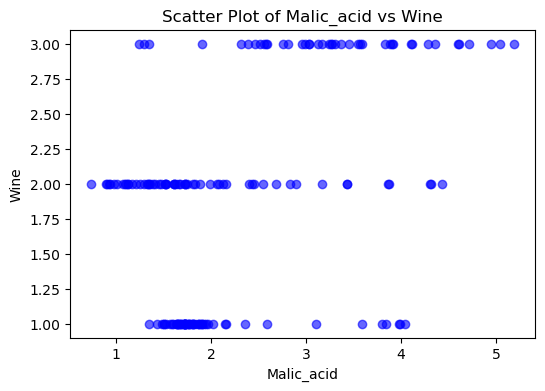

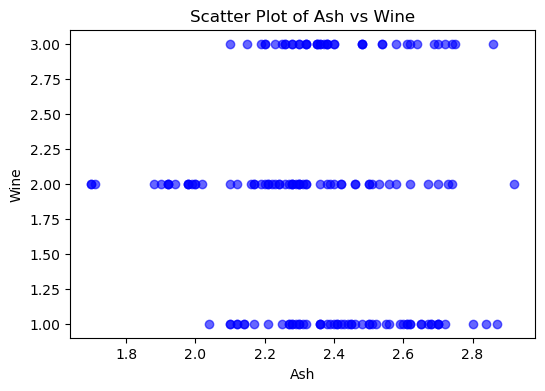

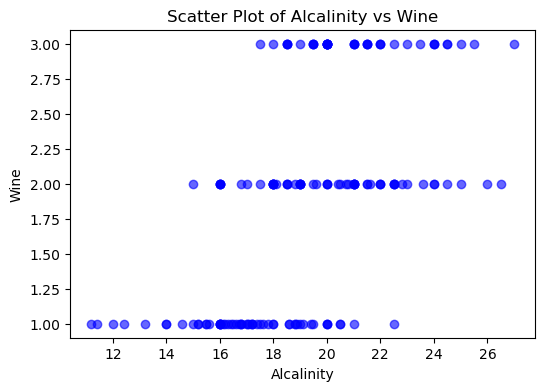

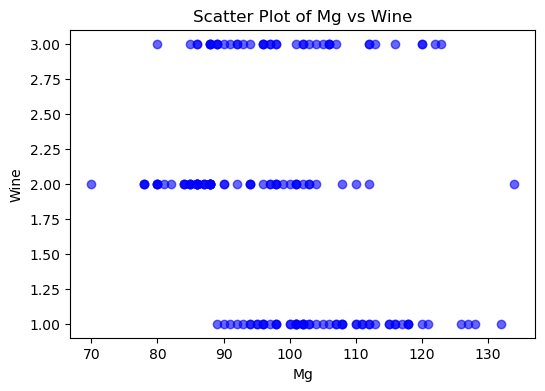

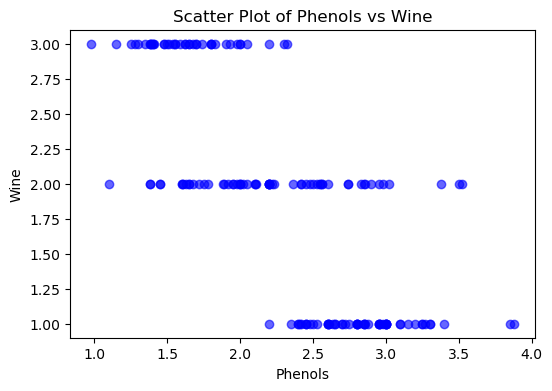

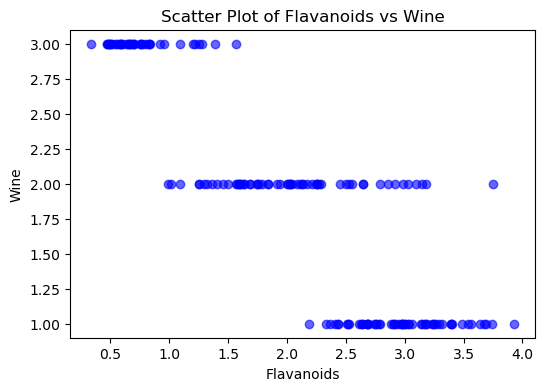

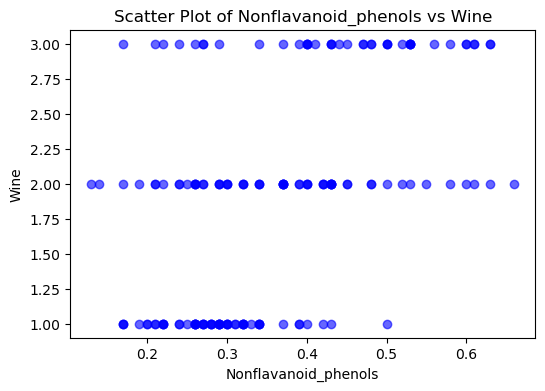

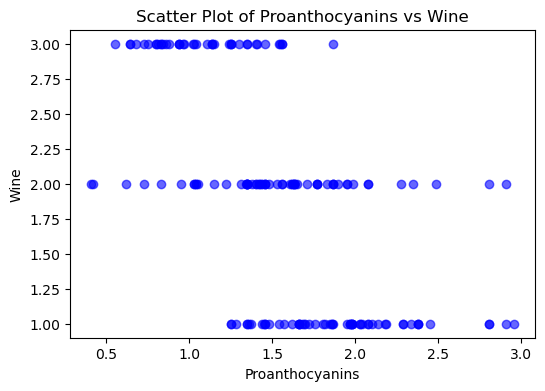

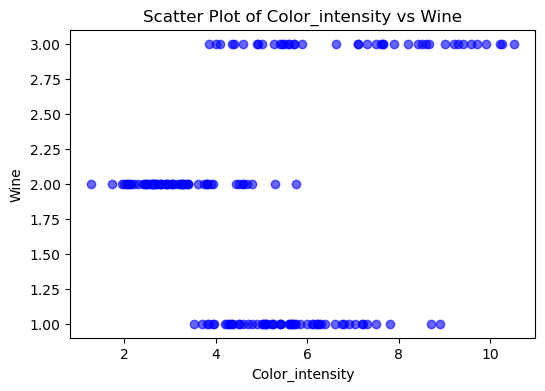

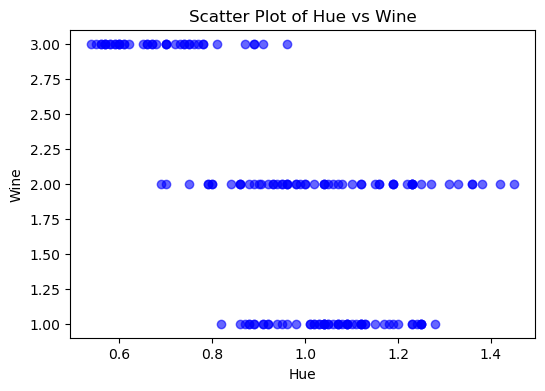

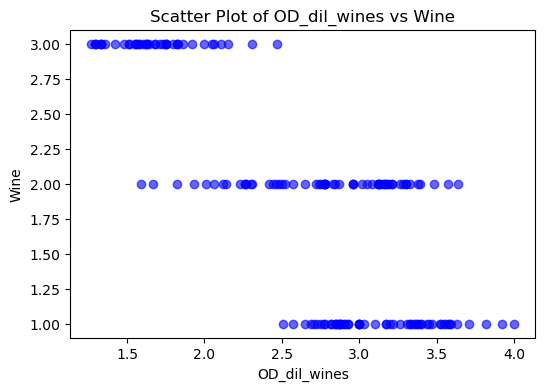

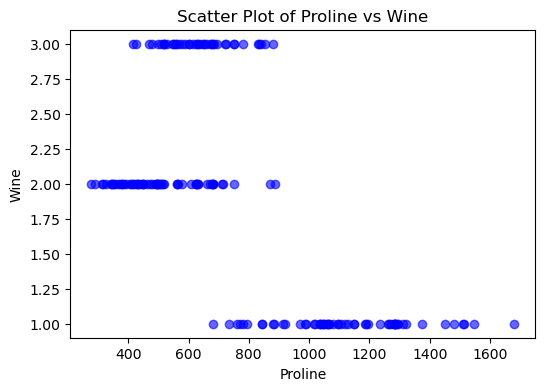

In [18]:
## ---------------------------------- Bivariate Analysis ------------------------------##

# Printing column names
print("Columns in the dataset:", wine_df.columns.tolist())

# Setting target variable
target = 'Wine'

# Plotting scatterplots for each feature against the target variable
for column in wine_df.columns:
    if column != target:
        plt.figure(figsize=(6, 4))
        plt.scatter(wine_df[column], wine_df[target], color='blue', alpha=0.6)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.title(f'Scatter Plot of {column} vs {target}')
        plt.show()

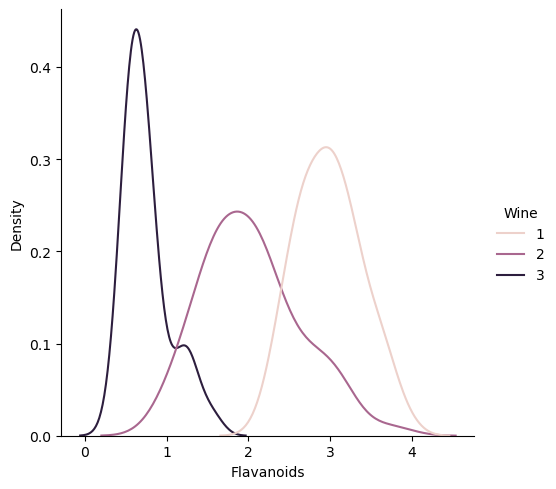

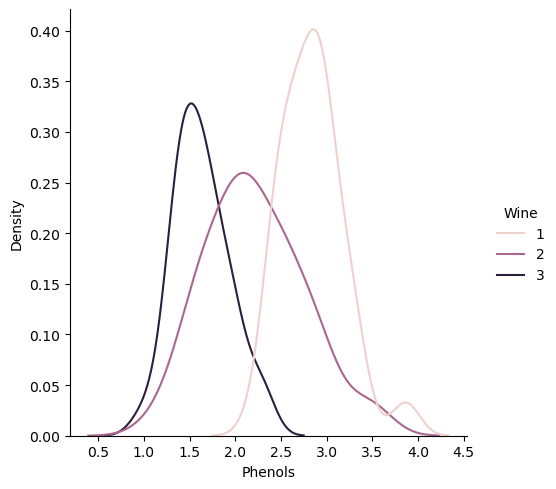

In [19]:
# Visualizations

sns.displot(x = wine_df.Flavanoids, hue = wine_df.Wine, kind = 'kde')
plt.show()

sns.displot(x = wine_df.Phenols, hue = wine_df.Wine, kind = 'kde')
plt.show()

There are several columns which have this significant overlap for the classes 1, 2 and 3

In [20]:
# checking the count of the target variable again

wine_df['Wine'].value_counts()

Wine
2    61
1    58
3    42
Name: count, dtype: int64

Let's building a rudimentary model with all the features (until it specifically mentions a feature is explicitly related to some other feature). Then, based on the model evaluation results, we can drop features if required.

### Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [21]:
# initialize the StandardScaler
scaler = StandardScaler()

# normalize all the columns of the dataframe
df_norm = scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_scaled = pd.DataFrame(df_norm, columns = df_num.columns)

df_scaled.head()

Alcohol  Malic_acid       Ash  Alcalinity        Mg   Phenols  Flavanoids  \
0  1.495711   -0.571130  0.277425   -1.208619  2.309259  0.808420    1.034224   
1  0.200698   -0.504145 -0.928625   -2.672685  0.118914  0.570475    0.728906   
2  0.150407    0.050878  1.275535   -0.210392  0.200038  0.808420    1.217414   
3  1.671732   -0.341465  0.568540   -0.809329  1.173525  2.474030    1.471845   
4  0.250990    0.270973  2.107293    0.588189  1.579144  0.808420    0.657665   

   Nonflavanoid_phenols  Proanthocyanins  Color_intensity       Hue  \
0             -0.643463         1.415284         0.296494  0.372149   
1             -0.808165        -0.511374        -0.300438  0.418153   
2             -0.478761         2.407227         0.315445  0.326144   
3             -0.972867         1.205450         1.319806 -0.455928   
4              0.262398         0.518720        -0.328863  0.372149   

   OD_dil_wines   Proline  
0      1.826678  0.947436  
1      1.091015  0.900976  
2      0.765626  1.319115  
3      1.161752  2.232826  
4      0.426090 -0.074682

In [22]:
# copying the scaled df

df_scaled1 = df_scaled.copy()
df_scaled2 = df_scaled.copy()

 ## K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of K to perform the K-means clustering.

In [23]:
# -------------- Optimal Value of K Using Elbow Plot --------------- #

# create several cluster combinations ranging from 1 to 10 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

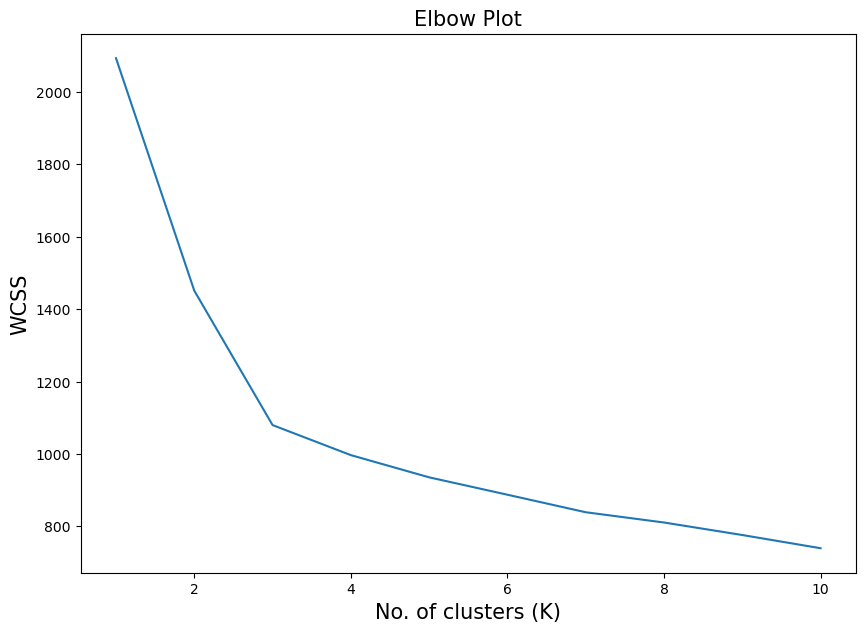

In [24]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

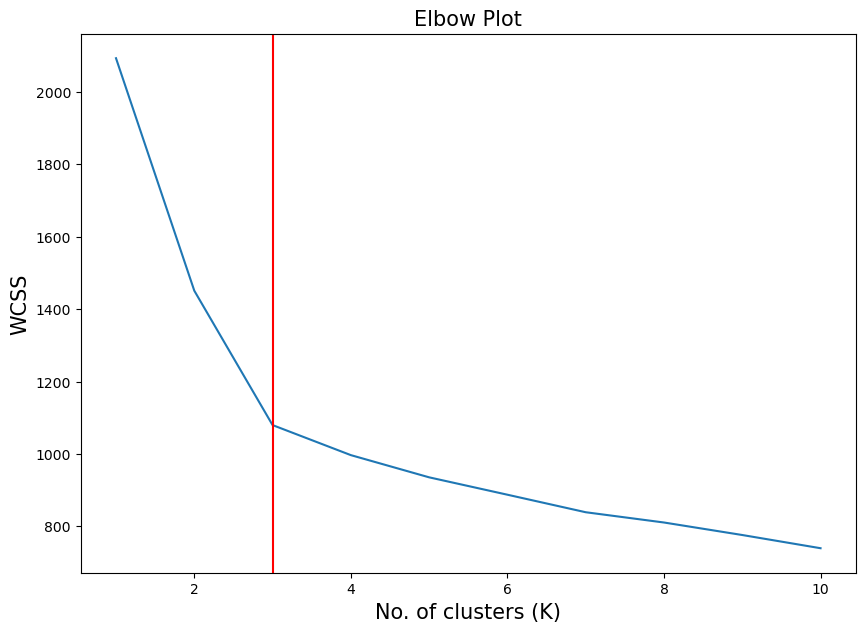

In [25]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

For 2 clusters the silhouette score is 0.27253746162802545
For 3 clusters the silhouette score is 0.3010147337033009
For 4 clusters the silhouette score is 0.24831022549843706
For 5 clusters the silhouette score is 0.22473374987442807
For 6 clusters the silhouette score is 0.1369337552508487
For 7 clusters the silhouette score is 0.1455131932690194
For 8 clusters the silhouette score is 0.14427541847754635
For 9 clusters the silhouette score is 0.13365131007737688
For 10 clusters the silhouette score is 0.13267699612462175


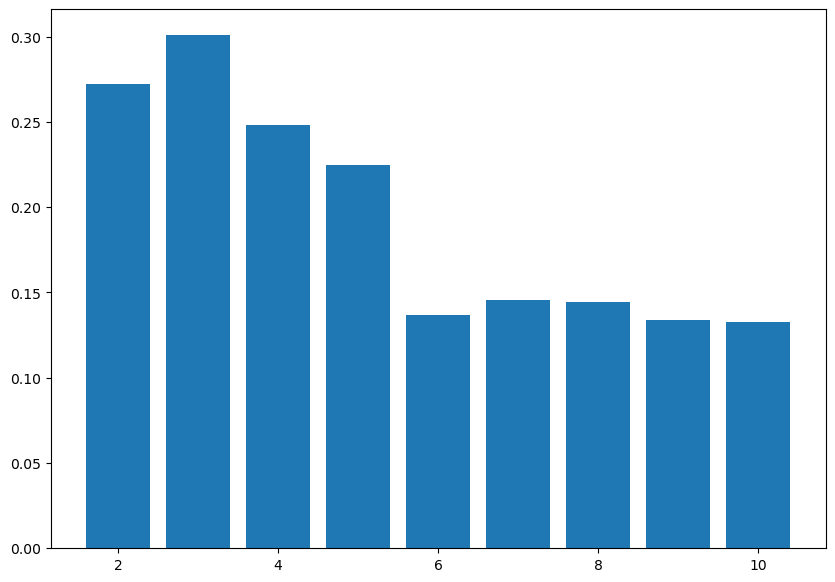

In [26]:
# --------- Optimal Value of K Using Silhouette Score -----------# 

# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_coefficients=[]

for K in n_clusters:
    cluster = KMeans(n_clusters= K, random_state= 1)
    predict = cluster.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, predict, random_state= 1) # silhouette coefficients
    print (f"For {K} clusters the silhouette score is {score}")
    silhouette_coefficients.append(score)

# Plot of silhouette coefficients
plt.bar(range(2,11), silhouette_coefficients)
plt.show()

### Build the Clusters

In [27]:
# build a K-Means model with 3 clusters
clusters_3 = KMeans(n_clusters = 3, random_state = 1)

# fit the model
clusters_3.fit(df_scaled)

# predictions of clusters
pred = clusters_3.predict(df_scaled)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [28]:
results = clusters_3.labels_
results = pd.DataFrame(results, columns=['cluster'])

# Check the size of each cluster
obs = results.groupby('cluster').size()
obs

cluster
0    45
1    58
2    58
dtype: int64

In [29]:
# concatenating the dataframes

new_df = pd.concat([df_scaled, results], axis = 1)
new_df.reset_index(drop = True)
new_df.head()

Alcohol  Malic_acid       Ash  Alcalinity        Mg   Phenols  Flavanoids  \
0  1.495711   -0.571130  0.277425   -1.208619  2.309259  0.808420    1.034224   
1  0.200698   -0.504145 -0.928625   -2.672685  0.118914  0.570475    0.728906   
2  0.150407    0.050878  1.275535   -0.210392  0.200038  0.808420    1.217414   
3  1.671732   -0.341465  0.568540   -0.809329  1.173525  2.474030    1.471845   
4  0.250990    0.270973  2.107293    0.588189  1.579144  0.808420    0.657665   

   Nonflavanoid_phenols  Proanthocyanins  Color_intensity       Hue  \
0             -0.643463         1.415284         0.296494  0.372149   
1             -0.808165        -0.511374        -0.300438  0.418153   
2             -0.478761         2.407227         0.315445  0.326144   
3             -0.972867         1.205450         1.319806 -0.455928   
4              0.262398         0.518720        -0.328863  0.372149   

   OD_dil_wines   Proline  cluster  
0      1.826678  0.947436        2  
1      1.091015  0.900976        2  
2      0.765626  1.319115        2  
3      1.161752  2.232826        2  
4      0.426090 -0.074682        2

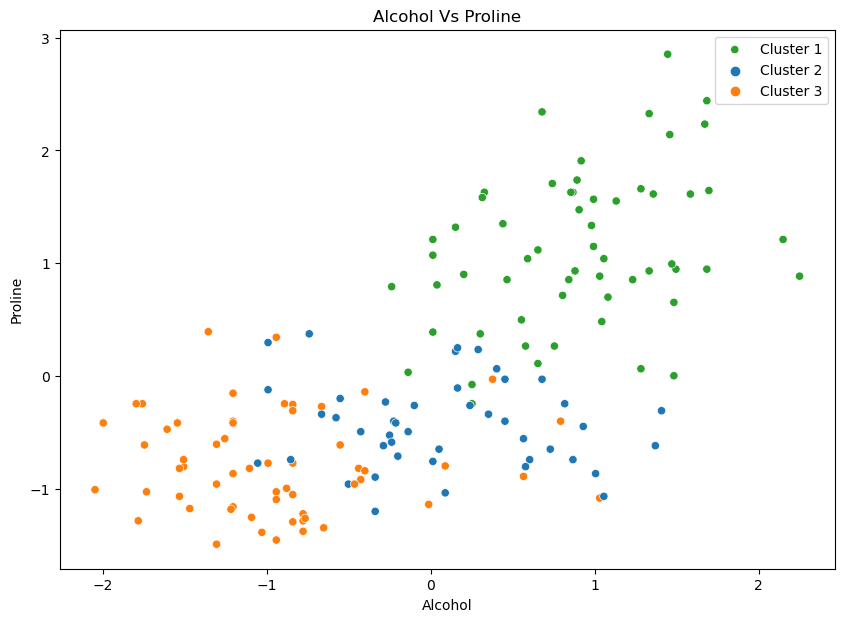

In [35]:
# Analyzing the Clusters based on different features

sns.scatterplot(data = new_df, x = 'Alcohol', y = 'Proline', hue = 'cluster', palette="tab10")
plt.title('Alcohol Vs Proline')
plt.legend(labels = ['Cluster 1','Cluster 2', 'Cluster 3'])
plt.show()

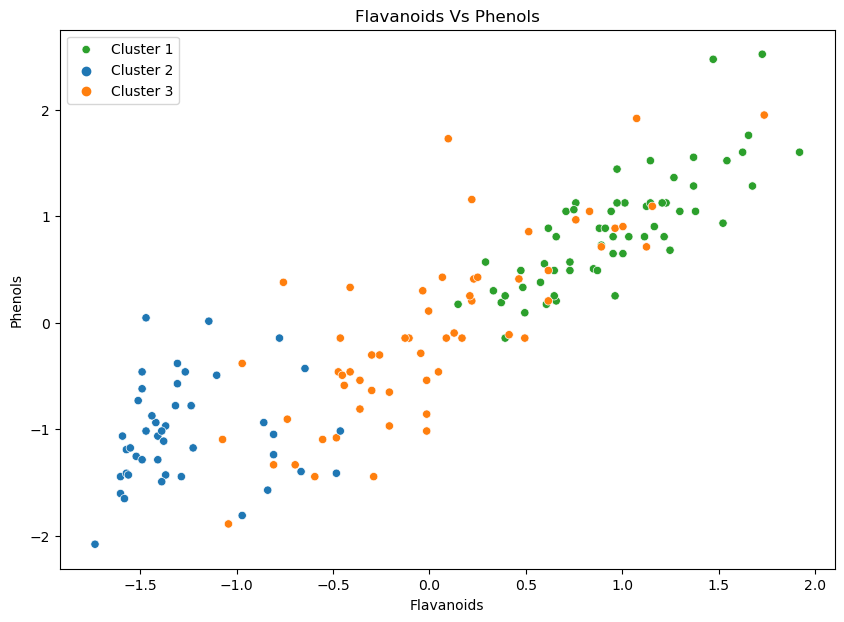

In [36]:
sns.scatterplot(data = new_df, x = 'Flavanoids', y = 'Phenols', hue = 'cluster', palette="tab10")
plt.title('Flavanoids Vs Phenols')
plt.legend(labels = ['Cluster 1','Cluster 2', 'Cluster 3'])
plt.show()

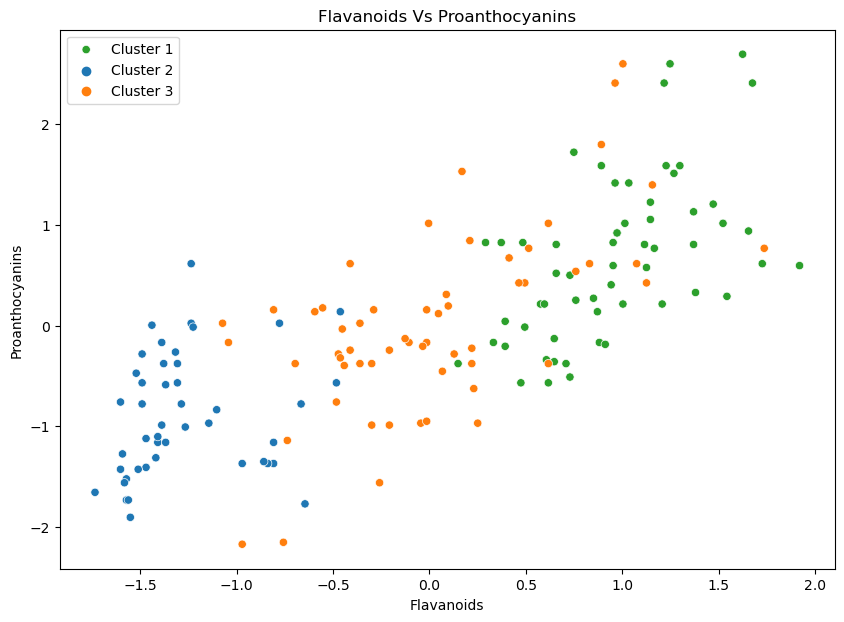

In [37]:
sns.scatterplot(data = new_df, x = 'Flavanoids', y = 'Proanthocyanins', hue = 'cluster', palette="tab10")
plt.title('Flavanoids Vs Proanthocyanins')
plt.legend(labels = ['Cluster 1','Cluster 2', 'Cluster 3'])
plt.show()

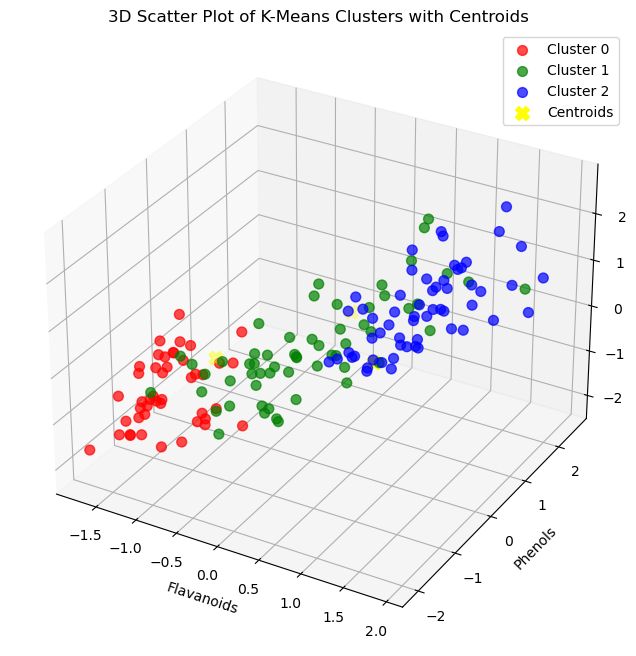

In [38]:
# Get centroids
centroids = clusters_3.cluster_centers_

# Plotting the 3D scatter plot with clusters and centroids
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']  # Colors for clusters

# Plot each cluster with a different color
for i in range(3):
    cluster_data = new_df[new_df['cluster'] == i]
    ax.scatter(cluster_data['Flavanoids'], cluster_data['Phenols'], cluster_data['Proanthocyanins'],
               label=f'Cluster {i}', color=colors[i], s=50, alpha=0.7)

# Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='yellow', s= 100, marker='X', label='Centroids')

# Adding labels and title
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Phenols')
ax.set_zlabel('Proanthocyanins')
ax.set_title('3D Scatter Plot of K-Means Clusters with Centroids')
ax.legend()

# Show the plot
plt.show()

## Hierarchical Clustering

It is the hierarchy based clustering method. Agglomerative and Divisive clustering are the two types of hierarchical clustering.

Here we consider the `Agglomerative clustering`. In this method, each data point is considered as a single cluster and these clusters are grouped to form bigger clusters and eventually the single cluster of all the observations is created.

Let's calculate cophenet index for different distances

In [39]:
from scipy.spatial.distance import pdist

In [40]:
# Different linkage methods to try
linkage_methods = ['single', 'complete', 'average', 'ward']

# Dictionary to store cophenet indices for each method
cophenet_indices = {}

# Calculate cophenet index for each linkage method
for method in linkage_methods:
    
    # Perform hierarchical clustering using the specified linkage method
    Z = linkage(df_scaled, method=method)
    
    # Calculate the cophenet index
    c, _ = cophenet(Z, pdist(df_scaled))
    
    # Store the cophenet index
    cophenet_indices[method] = c

# Print cophenet indices for each linkage method
for method, index in cophenet_indices.items():
    print(f"Linkage method: {method}, Cophenet index: {index:.4f}")

Linkage method: single, Cophenet index: 0.5172
Linkage method: complete, Cophenet index: 0.6704
Linkage method: average, Cophenet index: 0.7517
Linkage method: ward, Cophenet index: 0.6863


**Interpretation**: The value of Average cophenetic correlation coefficient is 0.75. The value close to 1 indicates the best linkage quality. Here, we can say that the average linkage quality is good.

In [41]:
# instantiate linkage object with scaled data and consider 'average' linkage method 
link_mat = linkage(df_scaled, method = 'average')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[120.         122.           1.23604237   2.        ]
 [  9.          46.           1.25854163   2.        ]
 [ 11.          12.           1.27474755   2.        ]
 [ 15.          52.           1.28405402   2.        ]
 [ 87.         101.           1.30298626   2.        ]
 [  0.          20.           1.3185109    2.        ]
 [ 16.          17.           1.35129004   2.        ]
 [ 39.          55.           1.37657999   2.        ]
 [ 98.         108.           1.37989529   2.        ]
 [ 33.          36.           1.38842861   2.        ]]


To find the optimal number of clusters, we consider two methods: `Dendrogram` and `Silhouette Score Method`.

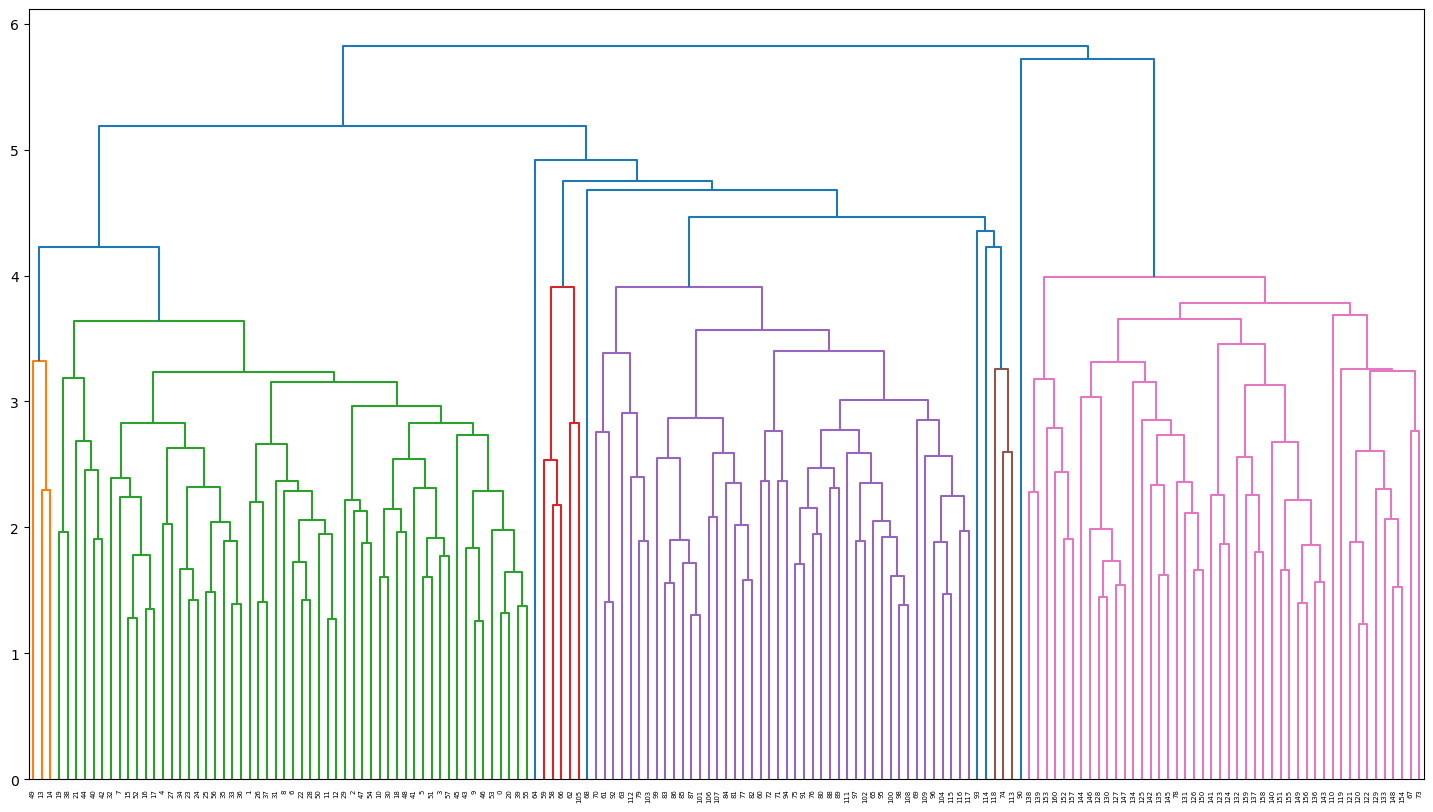

In [42]:
# Plotting the dendrogram

plt.figure(figsize=(18,10))
dendro = dendrogram(link_mat)
plt.show()

The above dendrogram shows that the number of clusters (=3) is constant for the maximum distance. Thus, we can consider the value 'three' as the optimal number of clusters. The different colors correspond to the different clusters.

2 [0.26093960104245245]
3 [0.26093960104245245, 0.2926994028296366]
4 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591]
5 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298]
6 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298, 0.20275428837189113]
7 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298, 0.20275428837189113, 0.12971394391378183]
8 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298, 0.20275428837189113, 0.12971394391378183, 0.12178110062571613]
9 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298, 0.20275428837189113, 0.12971394391378183, 0.12178110062571613, 0.1252078895584708]
10 [0.26093960104245245, 0.2926994028296366, 0.2349312868635591, 0.20206801208658298, 0.20275428837189113, 0.12971394391378183, 0.12178110062571613, 0.1252078895584708, 0.13435050338178917]


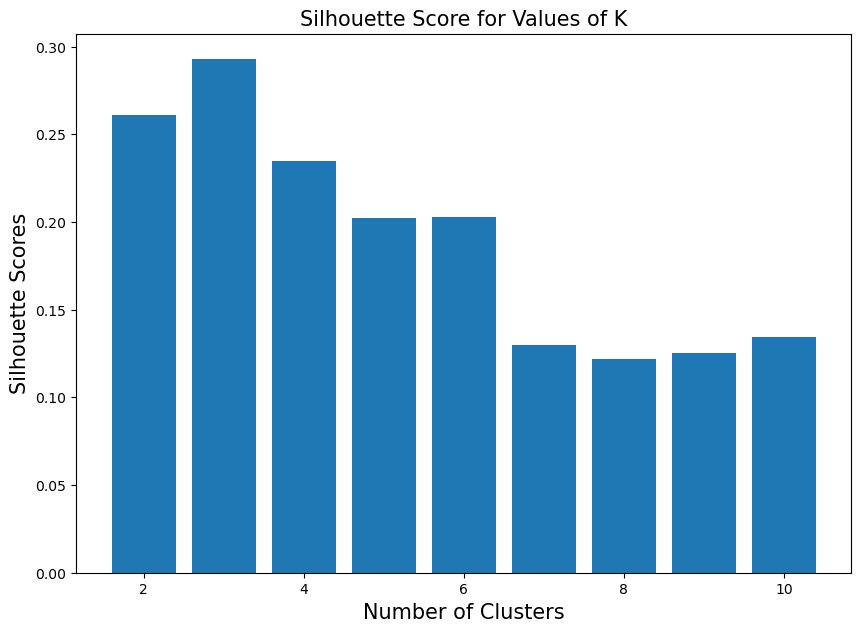

In [43]:
# Silhoutte Score method to decide optimum number of clusters:

silhouette_scores=[]

for i in range(2,11):
    model= AgglomerativeClustering(n_clusters=i)
    silhouette_scores.append(silhouette_score(df_scaled, model.fit_predict(df_scaled)))
    print(i, silhouette_scores)
    
# plot the Silhouette score for different K
plt.bar(range(2,11), silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

**Interpretation**: The above plot shows that the Silhouette score for K = 3 is the highest. This implies that K = 3 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 3 as the optimal value for the number of clusters.

In [44]:
# Let's use Average linkage method for predictions of optimal clusters (=3)

hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hierarchical.fit(df_scaled)

# Make predictions
pred_h = hierarchical.fit_predict(df_scaled)
pred_h

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
hier_results = hierarchical.labels_
hier_results = pd.DataFrame(hier_results, columns=['Cluster'])

# Check the size of each cluster
hier_obs = hier_results.groupby('Cluster').size()
hier_obs

Cluster
0    114
1     46
2      1
dtype: int64

In [46]:
# concatenating the dataframes

hier_df = pd.concat([df_scaled, hier_results], axis = 1)
hier_df.reset_index(drop = True)
hier_df.head()

Alcohol  Malic_acid       Ash  Alcalinity        Mg   Phenols  Flavanoids  \
0  1.495711   -0.571130  0.277425   -1.208619  2.309259  0.808420    1.034224   
1  0.200698   -0.504145 -0.928625   -2.672685  0.118914  0.570475    0.728906   
2  0.150407    0.050878  1.275535   -0.210392  0.200038  0.808420    1.217414   
3  1.671732   -0.341465  0.568540   -0.809329  1.173525  2.474030    1.471845   
4  0.250990    0.270973  2.107293    0.588189  1.579144  0.808420    0.657665   

   Nonflavanoid_phenols  Proanthocyanins  Color_intensity       Hue  \
0             -0.643463         1.415284         0.296494  0.372149   
1             -0.808165        -0.511374        -0.300438  0.418153   
2             -0.478761         2.407227         0.315445  0.326144   
3             -0.972867         1.205450         1.319806 -0.455928   
4              0.262398         0.518720        -0.328863  0.372149   

   OD_dil_wines   Proline  Cluster  
0      1.826678  0.947436        0  
1      1.091015  0.900976        0  
2      0.765626  1.319115        0  
3      1.161752  2.232826        0  
4      0.426090 -0.074682        0

In Agglomerative Hierarchical clustering, the clusters are significantly different with one another.

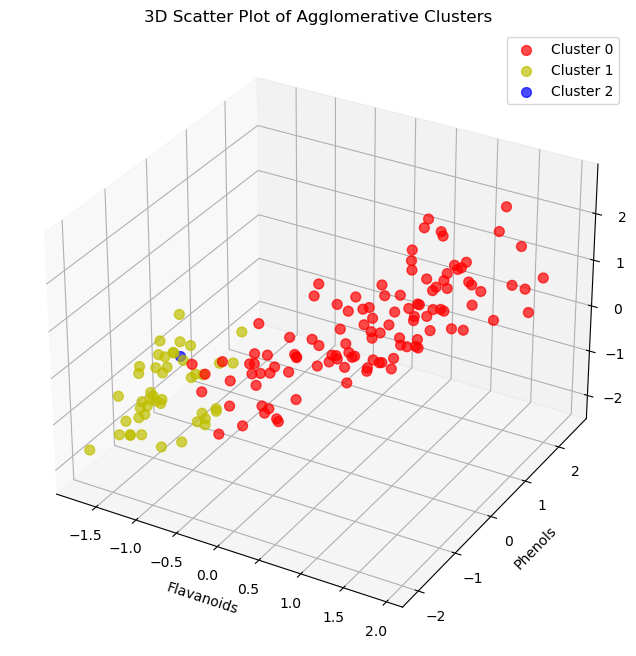

In [47]:
# Plotting the 3D scatter plot with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'y', 'b']  # Colors for clusters

# Plot each cluster with a different color
for i in range(3):
    h_cluster_data = hier_df[hier_df['Cluster'] == i]
    ax.scatter(h_cluster_data['Flavanoids'], h_cluster_data['Phenols'], h_cluster_data['Proanthocyanins'],
               label=f'Cluster {i}', color=colors[i], s=50, alpha=0.7)

# Adding labels and title
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Phenols')
ax.set_zlabel('Proanthocyanins')
ax.set_title('3D Scatter Plot of Agglomerative Clusters')
ax.legend()

# Show the plot
plt.show()

## PCA

In [48]:
# covariance matrix of the standardized data

covar_mat = np.cov(df_scaled.T)
covar_mat

array([[ 1.00625   ,  0.08817495,  0.22311719, -0.36279974,  0.42135272,
         0.343239  ,  0.32161082, -0.18283037,  0.23917229,  0.55319065,
         0.00292652,  0.11946523,  0.6655036 ],
       [ 0.08817495,  1.00625   ,  0.17800128,  0.30636193,  0.0214611 ,
        -0.36813172, -0.45831701,  0.29963225, -0.24493755,  0.28774948,
        -0.58597385, -0.39538785, -0.18558743],
       [ 0.22311719,  0.17800128,  1.00625   ,  0.31067204,  0.42017572,
         0.11281416,  0.05173424,  0.08758675,  0.0327157 ,  0.2006601 ,
        -0.03991768, -0.02394526,  0.27142085],
       [-0.36279974,  0.30636193,  0.31067204,  1.00625   , -0.18817357,
        -0.46444524, -0.51743943,  0.34191601, -0.33843183, -0.07058032,
        -0.32810948, -0.37157111, -0.4957485 ],
       [ 0.42135272,  0.0214611 ,  0.42017572, -0.18817357,  1.00625   ,
         0.2490066 ,  0.21015802, -0.24271464,  0.10393968,  0.34148869,
        -0.01670808,  0.03215784,  0.45072038],
       [ 0.343239  , -0.368131

In [49]:
covar_mat.shape

(13, 13)

In [50]:
# finding out eigenvalues and eigenvectors

eigenvalue,eigenvector = np.linalg.eig(covar_mat)
print('Eigenvalues: \n',eigenvalue,"\n")
print('Eigenvectors: \n',eigenvector,"\n")

Eigenvalues: 
 [5.08251669 2.68003725 1.24887356 0.90514197 0.75727596 0.561069
 0.0751624  0.45923896 0.17117007 0.3388659  0.31317644 0.22963608
 0.25908574] 

Eigenvectors: 
 [[ 0.18557431 -0.44247646  0.16999816  0.02553193 -0.20590811  0.16572656
  -0.04498416  0.45379032  0.21572196  0.21380706 -0.46901641 -0.35310953
   0.1596893 ]
 [-0.23083329 -0.25885837 -0.06761052 -0.55899066 -0.05140218  0.628137
   0.04302137 -0.02645107 -0.05585162  0.16932614  0.10925335  0.21740087
  -0.2681933 ]
 [ 0.01773965 -0.30225003 -0.71405852  0.12309461 -0.119906   -0.00169509
  -0.02588813  0.0528307  -0.05687184 -0.17029293  0.34314578 -0.4505822
  -0.11157664]
 [-0.278398    0.04521488 -0.5364439  -0.17294442 -0.01327542 -0.36650658
   0.05296108  0.3278961   0.07816099  0.1621149  -0.34998804  0.43705238
   0.10976119]
 [ 0.1342744  -0.38355013 -0.21112645  0.28151368  0.54994729  0.15970463
   0.01224542 -0.47115173 -0.02952424  0.17257534 -0.28353853  0.15355836
   0.16225186]
 [ 0.39060

To decide the number of components, we can use different methods as: 
* Kaiser criterion
* Scree plot
* Percentage of Explained Variation.

In [51]:
# Kaiser criterion:
list_eigenvalue = eigenvalue.tolist()
list_eigenvalue.sort(reverse=True)
print(list_eigenvalue)

[5.082516686125432, 2.680037250989758, 1.2488735583101926, 0.9051419747172128, 0.757275958489861, 0.5610689991405327, 0.4592389585922131, 0.3388658980796371, 0.31317643718309446, 0.2590857353691617, 0.22963607739370365, 0.17117007022342773, 0.07516239538578422]


Here the first three eigenvalues are greater than 1. Thus we can consider 3 principal components using kaiser criterion.

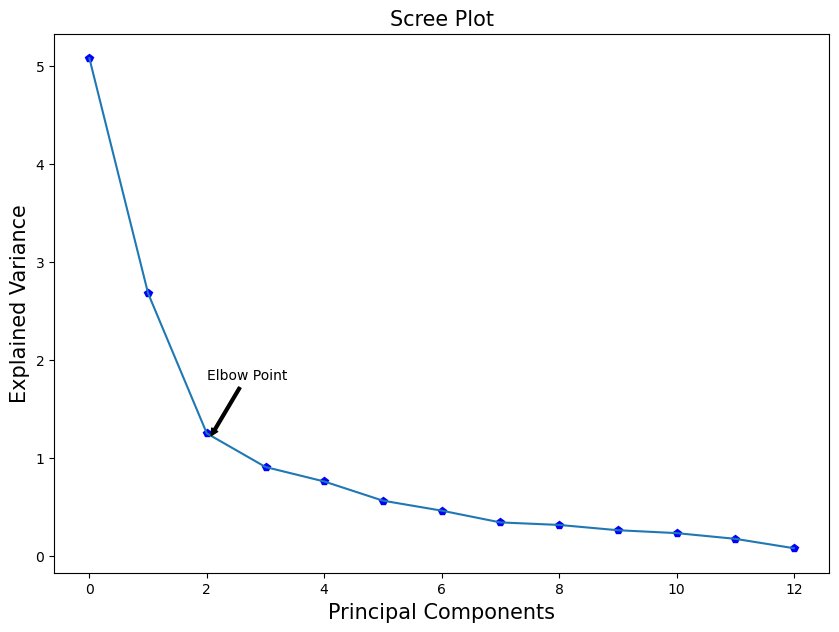

In [52]:
# Plotting Scree Plot (Elbow Plot):

# 'bp' represents blue color and pentagonal shape of points
plt.plot(list_eigenvalue,'bp')            

# plot a line plot
plt.plot(list_eigenvalue) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 

The Kaiser criterion considers 3 principal components and the scree plot also shows that only first three components explains most of the variation.

In [53]:
# Percentage of Explained Variation

percent_var=[]

for i in list_eigenvalue:
    variation = i/sum(list_eigenvalue)*100
    percent_var.append(variation)

# print the percentage of variation
percent_var

[38.85344815002717,
 20.487623514494075,
 9.547050612978056,
 6.919384422109602,
 5.789018316214892,
 4.289108450190405,
 3.5106657130795056,
 2.5904703149900574,
 2.3940864763160574,
 1.9805885169166673,
 1.7554597411845465,
 1.3085146314261071,
 0.5745811400728842]

In [54]:
# calculate the cumulative percentage of variation

np.cumsum(percent_var)

array([ 38.85344815,  59.34107166,  68.88812228,  75.8075067 ,
        81.59652502,  85.88563347,  89.39629918,  91.98676949,
        94.38085597,  96.36144449,  98.11690423,  99.42541886,
       100.        ])

We can see that the first three components explain approximately 68% of the variation in the data. By considering the five components as per the scree plot, the components explain approximately 80% of the variation. To explain 95% of the variation in the data, we need to consider eight principal components.

In this case, let's choose the three principal components that explain 68% of the variation.

Thus, we take the dot product of the scaled data and the eigenvectors corresponding to the first three eigenvalues to get the principal components.

### Principal Components

Using the in-built PCA function from the sklearn library to perform PCA. We consider the number of components = 3.

In [55]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 3, random_state = 1)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df_scaled)

In [56]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])

# head() to display top five rows of the transformed data
df_pca.head()

PC1       PC2       PC3
0  3.482298 -1.494604  0.133281
1  2.278164  0.375183 -1.873077
2  2.617118 -0.853663  1.096403
3  3.925864 -2.593702 -0.084049
4  1.005790 -1.012622  2.495217

In [57]:
# check its shape

df_pca.shape

(161, 3)

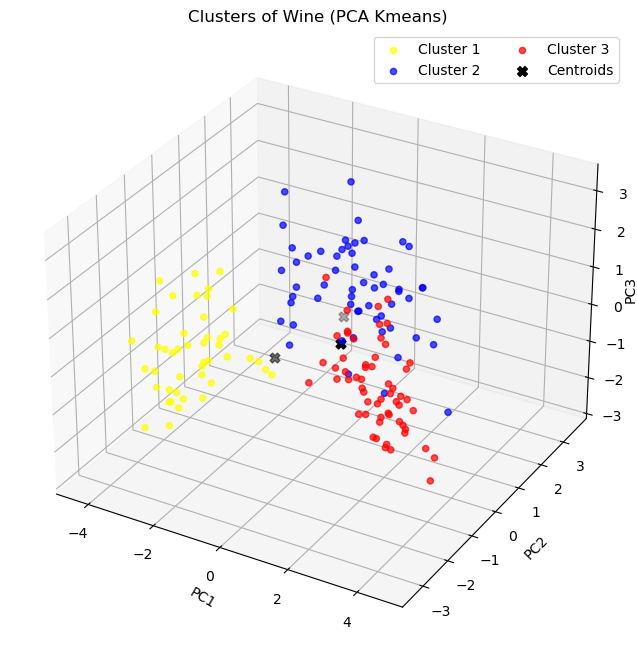

In [58]:
# Visualizing the clusters using K-means

plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(components[pred == 0, 0], components[pred == 0, 1], components[pred == 0, 2], c = 'yellow', label = 'Cluster 1', alpha = 0.7)
ax.scatter(components[pred == 1, 0], components[pred == 1, 1], components[pred == 1, 2], c = 'blue', label = 'Cluster 2', alpha = 0.7)
ax.scatter(components[pred == 2, 0], components[pred == 2, 1], components[pred == 2, 2], c = 'red', label = 'Cluster 3', alpha = 0.7)
ax.scatter(clusters_3.cluster_centers_[:, 0], clusters_3.cluster_centers_[:, 1], 
           clusters_3.cluster_centers_[:, 2], c = 'black', s = 50, marker='X', label = 'Centroids')

ax.set_xlabel('PC1', rotation=-30)
ax.set_ylabel('PC2', rotation=45)
ax.set_zlabel('PC3', rotation=90)
ax.zaxis.labelpad = -4
plt.legend(bbox_to_anchor = (1.0, 1.0), ncol = 2)
plt.title("Clusters of Wine (PCA Kmeans)")
plt.show()

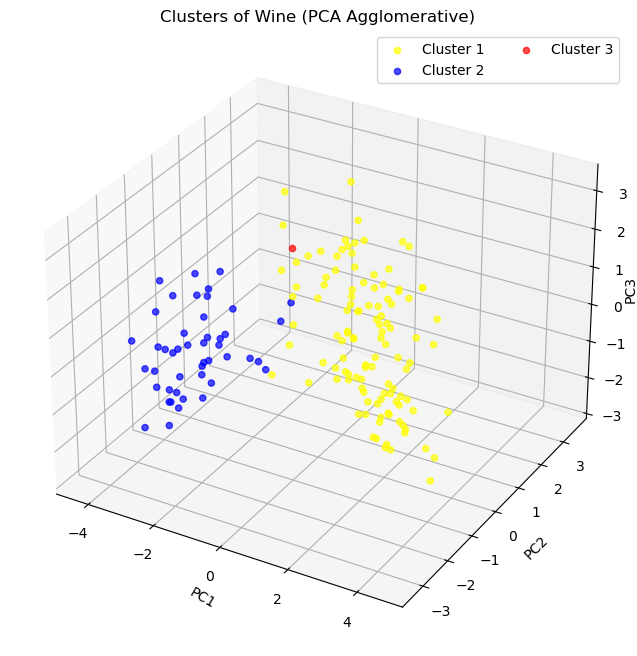

In [59]:
# Visualizing the clusters using Hierarchical clustering

plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(components[pred_h == 0, 0], components[pred_h == 0, 1], components[pred_h == 0, 2], c = 'yellow', label = 'Cluster 1', alpha = 0.7)
ax.scatter(components[pred_h == 1, 0], components[pred_h == 1, 1], components[pred_h == 1, 2], c = 'blue', label = 'Cluster 2', alpha = 0.7)
ax.scatter(components[pred_h == 2, 0], components[pred_h == 2, 1], components[pred_h == 2, 2], c = 'red', label = 'Cluster 3', alpha = 0.7)

ax.set_xlabel('PC1', rotation=-30)
ax.set_ylabel('PC2', rotation=45)
ax.set_zlabel('PC3', rotation=90)
ax.zaxis.labelpad = -4
plt.legend(bbox_to_anchor = (1.0, 1.0), ncol = 2)
plt.title("Clusters of Wine (PCA Agglomerative)")
plt.show()

Agglomerative is doing suboptimal clustering.

In [60]:
silhouette_kmeans = silhouette_score(df_scaled, clusters_3.labels_)
silhouette_agglo = silhouette_score(df_scaled, hierarchical.labels_)
print(f"KMeans Silhouette Score: {silhouette_kmeans}")
print(f"Agglomerative Silhouette Score: {silhouette_agglo}")

KMeans Silhouette Score: 0.3010147337033009
Agglomerative Silhouette Score: 0.23562260585543945


Let's use K-means as final clustering algorithm and predict cluster labels using Supervised Learning techniques.

## Supervised Modelling

### Train-Test dataset split

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
X = new_df.iloc[ : , 0:13]
y = pred

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# adding back the column names
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)
y_train = np.array(y_train)
y_test = np.array(y_test)

# check the dimensions of train and test subsets
print(f"X-train shape: {X_train.shape}")
print(f"X-test shape: {X_test.shape}")
print(f"y-train shape: {y_train.shape}")
print(f"y-test shape: {y_test.shape}")

X-train shape: (112, 13)
X-test shape: (49, 13)
y-train shape: (112,)
y-test shape: (49,)


In [63]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

### Logistic Regression Model

In [64]:
# Building logistic regression to predict the credit scores

lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train, y_train)

# Making predictions
y_predict = lr_model.predict(X_test)

# Model accuracy
model_acc_score = round(100 * accuracy_score(y_test, y_predict), 2)
print(f"Model accuracy score: {model_acc_score}%")

# Confusion matrix
lr_cm = confusion_matrix(y_test, y_predict)
print(f"Confusion matrix: \n{lr_cm}")

Model accuracy score: 97.96%
Confusion matrix: 
[[12  0  0]
 [ 1 18  0]
 [ 0  0 18]]


In [65]:
from matplotlib.colors import ListedColormap

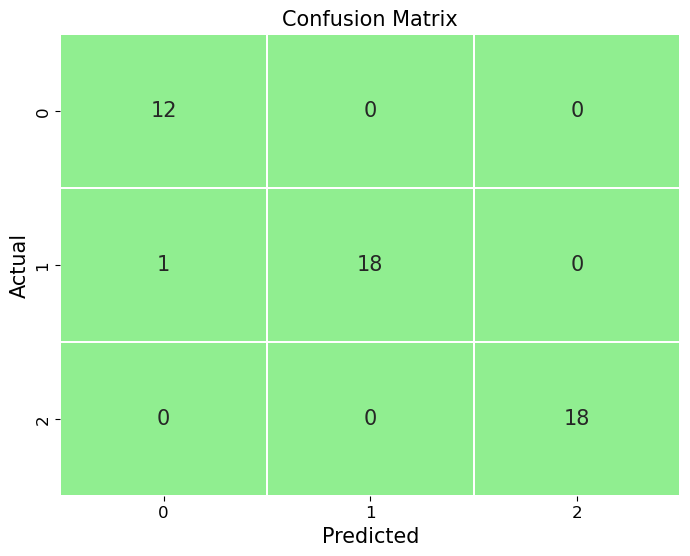

In [66]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [67]:
# call the function to print the classification report

acc_table = get_test_report(lr_model, test_data = X_test.values)
print(acc_table)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        18

    accuracy                           0.98        49
   macro avg       0.97      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [68]:
# F1-score

p = round(100 * precision_score(y_test, y_predict, average = 'weighted'), 2)
r = round(100 * recall_score(y_test, y_predict, average = 'weighted'), 2)

lr_f1 = (2*r*p)/(r+p)
print(f"F1-score of Logistic Regression model: {lr_f1}")

F1-score of Logistic Regression model: 98.03993472052224


##### Tabulate the results

In [69]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
results = pd.DataFrame(columns=['Model_Name', 'Model_Accuracy', 'Model_Precision', 'Model_Recall','Model_F1-score'])

# print the score card
results

Empty DataFrame
Columns: [Model_Name, Model_Accuracy, Model_Precision, Model_Recall, Model_F1-score]
Index: []

In [70]:
# compile the required information
log_reg_metrics = pd.Series({
                     'Model_Name': "Logistic Regression",
                     'Model_Accuracy': model_acc_score,
                     'Model_Precision': p,
                     'Model_Recall': r,
                     'Model_F1-score': lr_f1
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(log_reg_metrics, ignore_index=True)

# print the result table
results

Model_Name  Model_Accuracy  Model_Precision  Model_Recall  \
0  Logistic Regression           97.96            98.12         97.96   

   Model_F1-score  
0       98.039935

### Decision Tree Classifier

In [71]:
decision_tree = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 1)

# fitting our model
decision_tree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = decision_tree.predict(X_test)

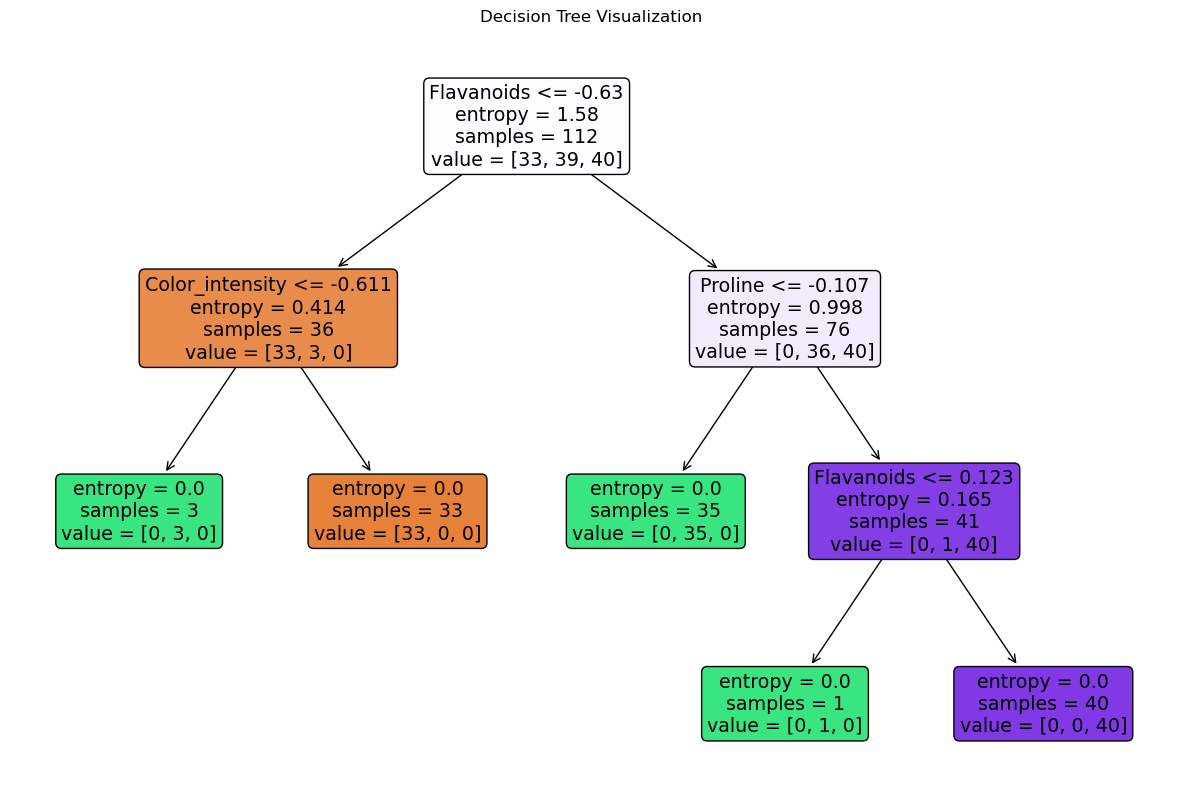

In [72]:
# Plotting the decision tree
features = X_train.columns.to_list()

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names = features, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Decision Tree Confusion Matrix:
 [[ 9  3  0]
 [ 0 19  0]
 [ 0  1 17]]


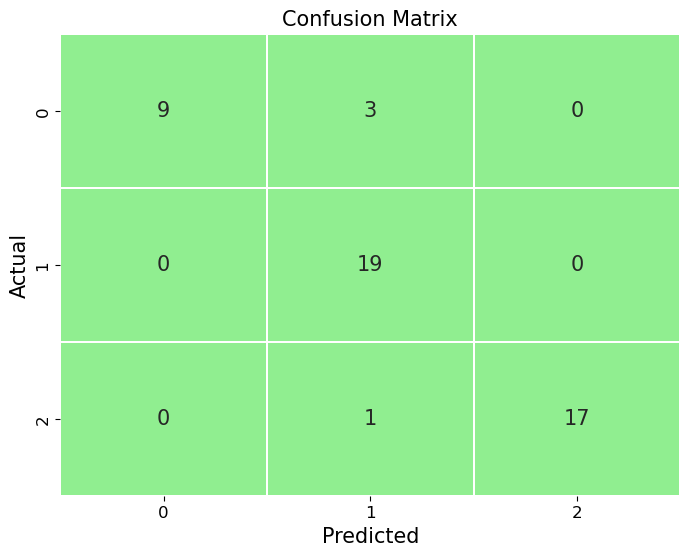

In [73]:
dt_cm = confusion_matrix(y_test, y_pred)

# Evaluating the model
print(f"Decision Tree Confusion Matrix:\n", dt_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [74]:
dt_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
print(f"Decision Tree Model accuracy: {dt_accuracy}%")

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Decision Tree model to the function
dt_test_report = get_test_report(decision_tree, test_data = X_test.values)

# print the performace measures
print(dt_test_report)

Decision Tree Model accuracy: 91.84%
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.83      1.00      0.90        19
           2       1.00      0.94      0.97        18

    accuracy                           0.92        49
   macro avg       0.94      0.90      0.91        49
weighted avg       0.93      0.92      0.92        49



In [75]:
# F1-score

p = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
r = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

dt_f1 = (2*r*p)/(r+p)
print(f"F1-score of Decision Tree model: {dt_f1}")

F1-score of Decision Tree model: 92.54455321447865


In [76]:
# compile the required information
dt_metrics = pd.Series({
                     'Model_Name': "Decision Tree",
                     'Model_Accuracy': dt_accuracy,
                     'Model_Precision': p,
                     'Model_Recall': r,
                     'Model_F1-score': dt_f1       
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(dt_metrics, ignore_index=True)

# print the result table
results

Model_Name  Model_Accuracy  Model_Precision  Model_Recall  \
0  Logistic Regression           97.96            98.12         97.96   
1        Decision Tree           91.84            93.26         91.84   

   Model_F1-score  
0       98.039935  
1       92.544553

### Random Forest

In [80]:
# Applying Random Forest Classification model

rf = RandomForestClassifier(n_estimators = 22, criterion = 'entropy', random_state = 1)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

# Model Accuracy
rf_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
print(f"Random Forest Model accuracy: {rf_accuracy}%")

Random Forest Model accuracy: 95.92%


Random Forest Confusion Matrix:
 [[11  1  0]
 [ 1 18  0]
 [ 0  0 18]]


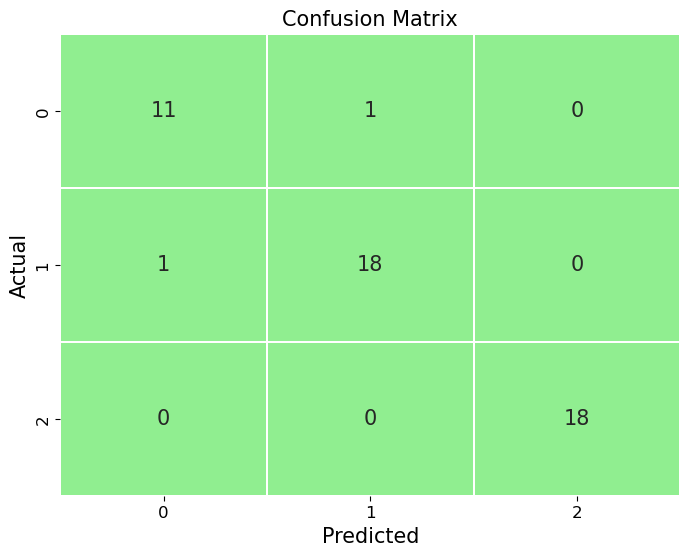

In [81]:
rf_cm = confusion_matrix(y_test, y_pred)

# Evaluating the model
print(f"Random Forest Confusion Matrix:\n", rf_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [82]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Random Forest model to the function
rf_test_report = get_test_report(rf, test_data = X_test.values)

# print the performace measures
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        18

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



In [83]:
# F1-score

p = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
r = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)

rf_f1 = (2*r*p)/(r+p)
print(f"F1-score of Random Forest model: {rf_f1}")

F1-score of Random Forest model: 95.91999999999999


In [84]:
# compile the required information
rf_metrics = pd.Series({
                     'Model_Name': "Random Forest Model",
                     'Model_Accuracy': rf_accuracy,
                     'Model_Precision': p,
                     'Model_Recall': r,
                     'Model_F1-score': rf_f1     
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(rf_metrics, ignore_index=True)

# print the result table
results

Model_Name  Model_Accuracy  Model_Precision  Model_Recall  \
0  Logistic Regression           97.96            98.12         97.96   
1        Decision Tree           91.84            93.26         91.84   
2  Random Forest Model           95.92            95.92         95.92   

   Model_F1-score  
0       98.039935  
1       92.544553  
2       95.920000

From the above table, all the supervised models have fairly high performance metrics. 

We can either go with Logistic regression (97%) or Random forest (95%) for predicting the clusters.